In [1]:
import cv2
import imghdr
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import imghdr

gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

datatrain_dir=r'C:\Users\HP\ml datasets\face expressions\train'
#os.listdir(datatrain_dir) will return 'happy','sad', etc.....
os.listdir(os.path.join(datatrain_dir,'happy'))
#this above line is not needed for this code, it is just for info purpose

C:\Users\HP\AppData\Local\Temp\ipykernel_21460\3663244363.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


['Training_10019449.jpg',
 'Training_10046809.jpg',
 'Training_10066226.jpg',
 'Training_10070997.jpg',
 'Training_10080933.jpg',
 'Training_10109375.jpg',
 'Training_10116721.jpg',
 'Training_10127474.jpg',
 'Training_10133389.jpg',
 'Training_10139297.jpg',
 'Training_10142161.jpg',
 'Training_10142426.jpg',
 'Training_10181727.jpg',
 'Training_1018317.jpg',
 'Training_10199847.jpg',
 'Training_10209551.jpg',
 'Training_10220224.jpg',
 'Training_10229138.jpg',
 'Training_10230185.jpg',
 'Training_10239785.jpg',
 'Training_10240470.jpg',
 'Training_10242543.jpg',
 'Training_10246389.jpg',
 'Training_10248095.jpg',
 'Training_10257744.jpg',
 'Training_10265501.jpg',
 'Training_1027250.jpg',
 'Training_10288829.jpg',
 'Training_10290756.jpg',
 'Training_10313464.jpg',
 'Training_10348116.jpg',
 'Training_10361011.jpg',
 'Training_10367793.jpg',
 'Training_10391066.jpg',
 'Training_1041361.jpg',
 'Training_10422282.jpg',
 'Training_10425802.jpg',
 'Training_10435640.jpg',
 'Training_1043

os.listdir(os.path.join(datatrain_dir,'happy')) will return everything inside the happy file


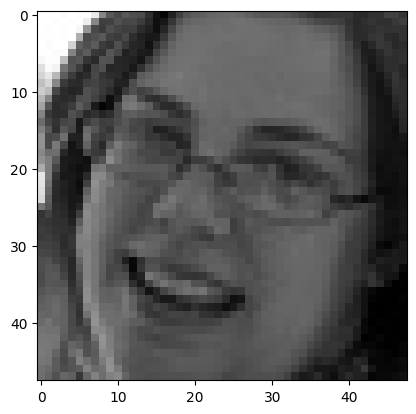

In [16]:
img_exts=['jpg','jpeg','png','bmp']
filepathpp=os.path.join(datatrain_dir,'happy','Training_10019449.jpg')
imagepp=cv2.imread(filepathpp)
plt.imshow(imagepp)

#this whole cell except the img_exts is summa for knowledge purpose.
#that file path command gives the filepath, we are putting that in the image and so visually seee the image

In [6]:
#this is come real serious code usefull for the whole problem

for image_class in os.listdir(datatrain_dir):
    for image in os.listdir(os.path.join(datatrain_dir,image_class)):
        image_path=os.path.join(datatrain_dir,image_class,image)
        
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in img_exts:
                print("image not in ext list {}").format(image_path)
                os.remove(image_path)
        except exception as e:
            print("issue with image {}".format(image_path))
            

NameError: name 'exception' is not defined

In [17]:
import numpy as np
import tensorflow as tf
data_train=tf.keras.utils.image_dataset_from_directory(datatrain_dir)
#now we have brought it to a specific table. but access it properly we have to iterate it.
data_iterator=data_train.as_numpy_iterator()
#now lets batch it into images and labels
batch=data_iterator.next()
len(batch)
#if we run it we will get the len(batch) as 2, bcoz one batch contains the images and the other batch contains the labels like(happy, sad) in ints

Found 12045 files belonging to 2 classes.


2

In [18]:
batch[1],batch[0]
batch[0].shape
batch[0].max()

#see here the batch[1] return the emotion values and the batch[0] return the images value

255.0

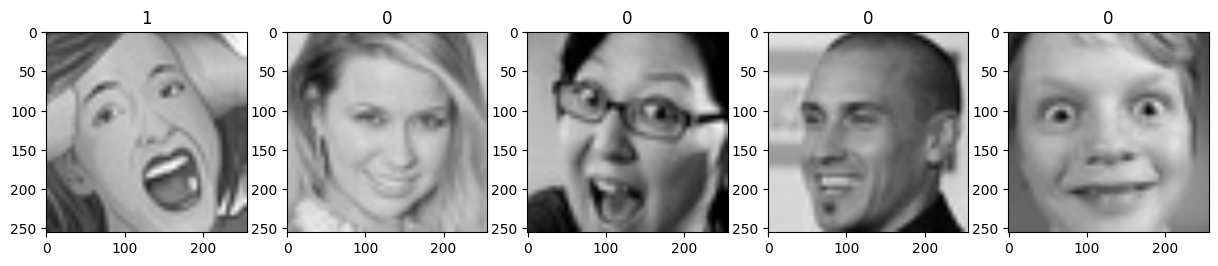

In [19]:
fig,ax=plt.subplots(ncols=5,figsize=(15,15))

for idx,img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

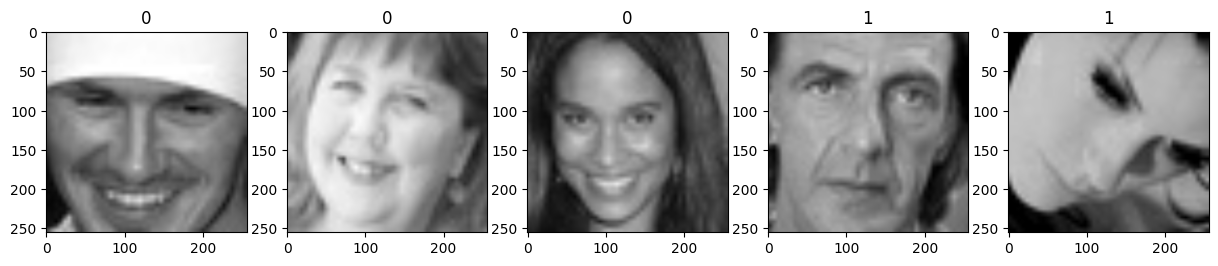

In [20]:
data_train=data_train.map(lambda x,y:(x/255.0,y))
scaled=data_train.as_numpy_iterator()
batch=scaled.next()

batch[0].max()

fig,ax=plt.subplots(ncols=5,figsize=(15,15))

for idx,img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    
#here in the image wwe should not do as.type(int), bcoz we have already reduced its size

In [21]:
len(data_train)

data_train=data_train.shuffle(buffer_size=len(data_train))

train_size=int(len(data_train)*0.7)
val_size=int(len(data_train)*0.2)
test_size=int(len(data_train)*0.1)

train=data_train.take(train_size)
val=data_train.skip(train_size).take(val_size)
test=data_train.skip(train_size+val_size).take(test_size)


In [22]:
#building the model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential

model=Sequential()

model.add(Conv2D(16,(3,3),1,activation='relu',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu',padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu',padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,204,529 (16.04 MB)

 Trainable params: 4,204,529 (16.04 MB)

 Non-trainable params: 0 (0.00 B)

the max pooling row output is twice less than that of the Conv2d output layer, bcoz it condenses the layers


In [23]:
hist=model.fit(train,epochs=20,validation_data=val)

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 79s 215ms/step - accuracy: 0.5973 - loss: 0.6820 - val_accuracy: 0.6733 - val_loss: 0.5921
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 49s 175ms/step - accuracy: 0.6935 - loss: 0.5830 - val_accuracy: 0.7375 - val_loss: 0.5267
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 48s 174ms/step - accuracy: 0.7476 - loss: 0.5139 - val_accuracy: 0.7812 - val_loss: 0.4637
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 48s 174ms/step - accuracy: 0.7645 - loss: 0.4680 - val_accuracy: 0.7908 - val_loss: 0.4286
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 49s 175ms/step - accuracy: 0.7908 - loss: 0.4256 - val_accuracy: 0.8300 - val_loss: 0.3724
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 48s 174ms/step - accuracy: 0.8389 - loss: 0.3531 - val_accuracy: 0.8769 - val_loss: 0.2832
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 48s 173ms/step - accuracy: 0.8743 - loss: 0.2938 - val_accuracy: 0.9275 - val_loss: 0.2063
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 48s 174ms/step - accuracy: 0.9052 - loss: 0

In [24]:
model.save(r"C:\Users\HP\ml datasets\face expressions\trained_model_test.keras")

In [25]:
loaded_model=tf.keras.models.load_model(r"C:\Users\HP\ml datasets\face expressions\trained_model_test.keras")
loaded_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,613,589 (48.12 MB)

 Trainable params: 4,204,529 (16.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,409,060 (32.08 MB)

In [26]:
hist.history

{'accuracy': [0.6234369277954102,
  0.7026318907737732,
  0.7441943287849426,
  0.7628327012062073,
  0.7961176633834839,
  0.8356701731681824,
  0.8743599057197571,
  0.9098487496376038,
  0.9383112788200378,
  0.9612957239151001,
  0.9754674434661865,
  0.982970118522644,
  0.9839591383934021,
  0.9878802299499512,
  0.9886864423751831,
  0.990731954574585,
  0.9923782348632812,
  0.9897582530975342,
  0.9923782348632812,
  0.9904727935791016],
 'loss': [0.6590241193771362,
  0.5704007148742676,
  0.5094164609909058,
  0.4659974277019501,
  0.42018455266952515,
  0.3566356599330902,
  0.29548966884613037,
  0.22146689891815186,
  0.16396716237068176,
  0.10608891397714615,
  0.07111449539661407,
  0.05563540756702423,
  0.0461735837161541,
  0.037588879466056824,
  0.03432546183466911,
  0.030324550345540047,
  0.025141512975096703,
  0.03116278350353241,
  0.020635878667235374,
  0.03249049186706543],
 'val_accuracy': [0.6733333468437195,
  0.737500011920929,
  0.78125,
  0.79083335

<function matplotlib.pyplot.show(close=None, block=None)>

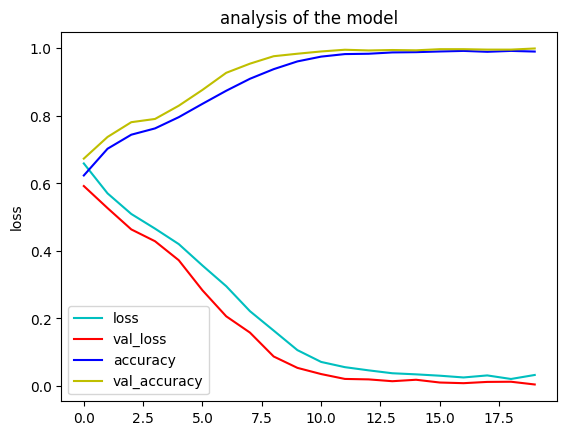

In [31]:
plt.plot(hist.history['loss'],'c',label='loss')
plt.plot(hist.history['val_loss'],'r',label='val_loss')
plt.plot(hist.history['accuracy'],'b',label='accuracy')
plt.plot(hist.history['val_accuracy'],'y',label='val_accuracy')
plt.ylabel('loss')
plt.legend()
plt.title('analysis of the model')
plt.show

In [37]:
imge=cv2.imread(r"C:\Users\HP\Downloads\WhatsApp Image 2025-02-02 at 11.48.01 PM.jpeg")

resize=tf.image.resize(imge,(256,256))
yhat=model.predict(np.expand_dims(resize/255,0))

if yhat<0.5:
    print("the given guy happy")
else:
    print("aioo sad guy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
aioo sad guy
